# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [65]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_importance
from sklearn.tree import DecisionTreeClassifier
import lightgbm as ltb

import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as mp
import seaborn as sns

Import Data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df_of_health=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/ML/project 2/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [8]:
#Make a copy of original data
df=df_of_health.copy()

In [9]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [10]:
#Knowing the shape of df
df.shape

(381109, 12)

In [11]:
#Knowing the columns of our df
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [12]:
#Knowing the description of df
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [13]:
#knowing the information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [14]:
#Checking Nulls
# print(df.isnull().sum())
#OR
df.isnull().values.any()

False

As we can see there is no null value in our df so no need to go for null value treatment

In [15]:
#checking Duplicates
# print(df.duplicated().sum())
#OR
df.duplicated().values.any()


False

Checking Outliers

In [16]:
df['Annual_Premium']=df.Annual_Premium.astype(int)

In [17]:
type(df['Annual_Premium'])

pandas.core.series.Series

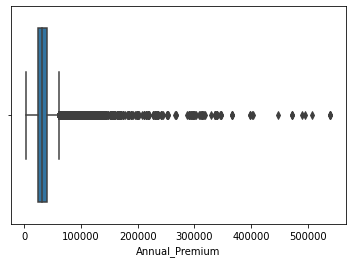

In [18]:
# for i in num_col.columns:
#   sns.boxplot(x=num_col[i])
sns.boxplot(x=df['Annual_Premium'])

In [19]:
# Creating fuction for Removing the outliers
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]

In [20]:
df.columns[8]

'Annual_Premium'

In [21]:
for i in df.columns:
      if i == df.columns[8]:
        removeOutliers(df, i) 
# Assigning filtered data back to our original variable
df = filtered_data
print("Shape of data after outlier removal is: ", df.shape)

IQR value for column Annual_Premium is: 14995.0
Shape of data after outlier removal is:  (370789, 12)


Checking our target variable

In [22]:
df.Response.value_counts()   #Response :	1:Customer is interested, 0:Customer is not interested

0    325634
1     45155
Name: Response, dtype: int64

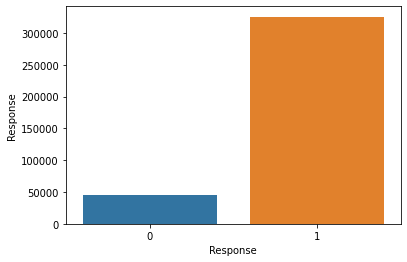

In [23]:
sns.barplot(x=df.Response,y=df.Response.value_counts())

In [24]:
df.Response.skew()

2.3130462247234798

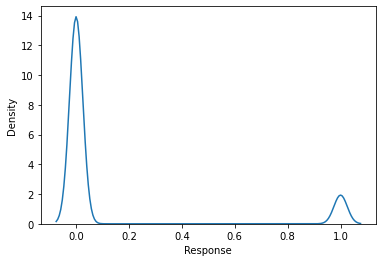

In [25]:
#checking the distribution of target variable
sns.kdeplot(df['Response'])


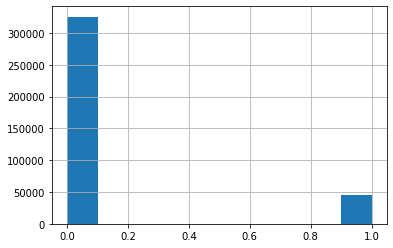

In [26]:
df['Response'].hist()

In [27]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [28]:
num_col=df[['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']]

In [29]:
num_col

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
0,44,28.0,40454,26.0,217
1,76,3.0,33536,26.0,183
2,47,28.0,38294,26.0,27
3,21,11.0,28619,152.0,203
4,29,41.0,27496,152.0,39
...,...,...,...,...,...
381104,74,26.0,30170,26.0,88
381105,30,37.0,40016,152.0,131
381106,21,30.0,35118,160.0,161
381107,68,14.0,44617,124.0,74


In [30]:
#for categorical col
cat_col=[]
for i in df.columns:
  if i not in num_col:
    cat_col.append(i)


In [31]:
cat_col

['id',
 'Gender',
 'Driving_License',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Response']

In [32]:
cat_col=df[cat_col]
cat_col

,id,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response
0,1,Male,1,0,> 2 Years,Yes,1
1,2,Male,1,0,1-2 Year,No,0
2,3,Male,1,0,> 2 Years,Yes,1
3,4,Male,1,1,< 1 Year,No,0
4,5,Female,1,1,< 1 Year,No,0
...,...,...,...,...,...,...,...
381104,381105,Male,1,1,1-2 Year,No,0
381105,381106,Male,1,1,< 1 Year,No,0
381106,381107,Male,1,1,< 1 Year,No,0
381107,381108,Female,1,0,> 2 Years,Yes,0


In [33]:
cat_col=cat_col.drop(['id'],axis=1)

In [34]:
cat_col

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response
0,Male,1,0,> 2 Years,Yes,1
1,Male,1,0,1-2 Year,No,0
2,Male,1,0,> 2 Years,Yes,1
3,Male,1,1,< 1 Year,No,0
4,Female,1,1,< 1 Year,No,0
...,...,...,...,...,...,...
381104,Male,1,1,1-2 Year,No,0
381105,Male,1,1,< 1 Year,No,0
381106,Male,1,1,< 1 Year,No,0
381107,Female,1,0,> 2 Years,Yes,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a7beb5c50>,
      dtype=object)

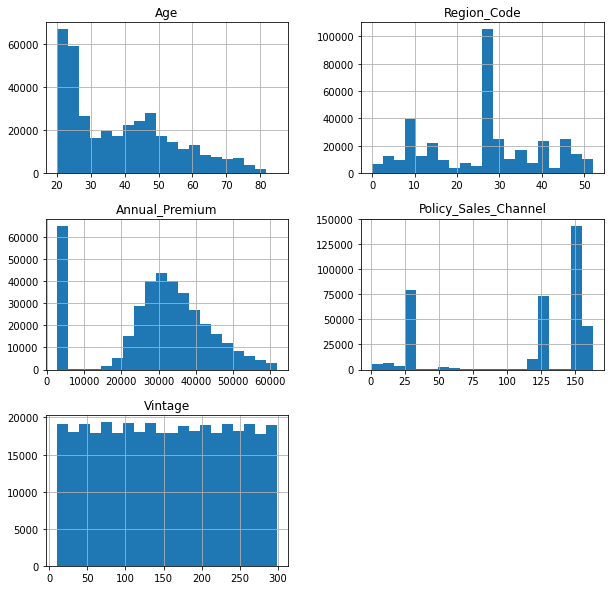

In [35]:
#Let's see the distribution of numerical columns
num_col.hist(figsize=(10,10),bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a7beb5290>,
      dtype=object)

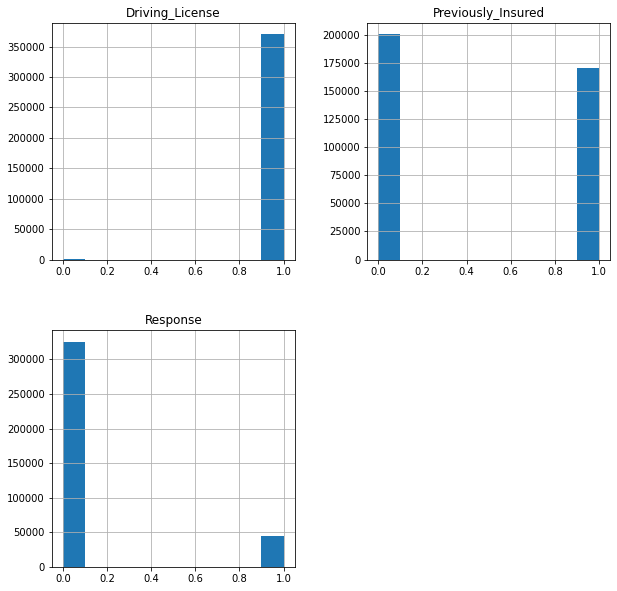

In [36]:
#Let's 
cat_col.hist(figsize=(10,10))

Let's visualize our features and find the relation between our target variable and other important features....

As we all know 1 means Customer is interested and 0 means Customer is not interested.

Text(0.5, 1.0, 'Response in terms of Previously Insured ')

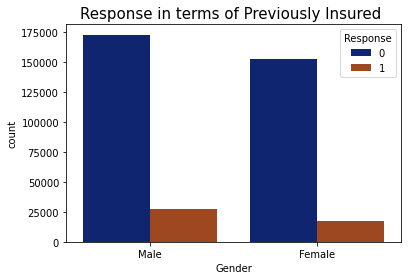

In [37]:
#count plot
ba=sns.countplot(x="Gender",hue ="Response",data=df,palette = "dark")
ba.set_title('Response in terms of Previously Insured ', fontsize=15)

Text(0.5, 1.0, 'Response in terms of Previously Insured ')

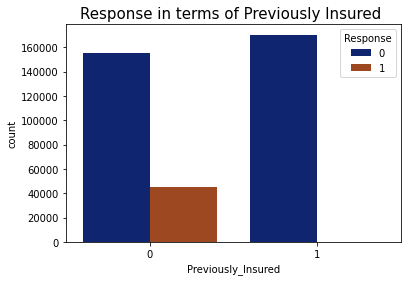

In [38]:
#In Previously_Insured 1 means Customer already has Vehicle Insurance and 0 means Customer doesn't have Vehicle Insurance yet
ba=sns.countplot(x="Previously_Insured",hue ="Response",data=df,palette = "dark")
ba.set_title('Response in terms of Previously Insured ', fontsize=15)

Text(0.5, 1.0, 'Response in terms of Vehicle_Age ')

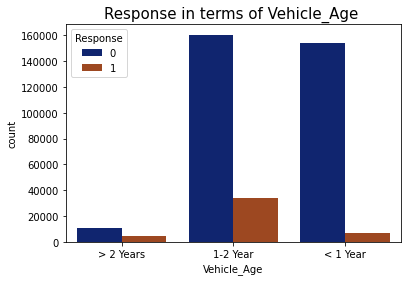

In [39]:
#count plot for Age of vehicle of policyholder
ba=sns.countplot(x="Vehicle_Age",hue ="Response",data=df,palette = "dark")
ba.set_title('Response in terms of Vehicle_Age ', fontsize=15)

Text(0.5, 1.0, 'Response in terms of Vehicle_Damage ')

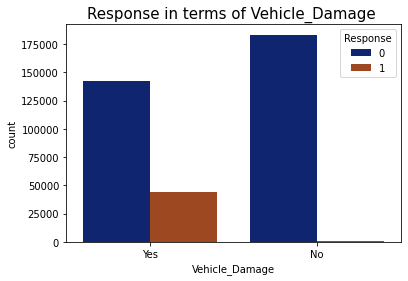

In [40]:
# In Vehicle_Damage 1 means Customer got his/her vehicle damaged in the past and 0 means Customer didn't get his/her vehicle damaged in the past.
ba=sns.countplot(x="Vehicle_Damage",hue ="Response",data=df,palette = "dark")    
ba.set_title('Response in terms of Vehicle_Damage ', fontsize=15)

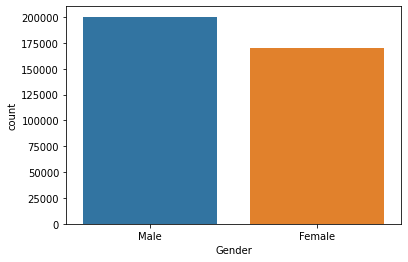

In [41]:
sns.countplot(x=df['Gender'], data=df)
mp.show()

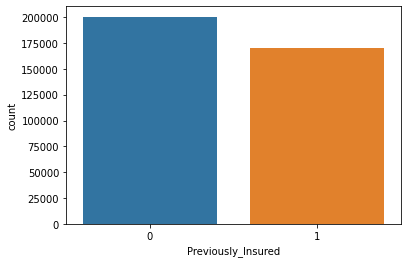

In [42]:
sns.countplot(x=df['Previously_Insured'], data=df)
mp.show()

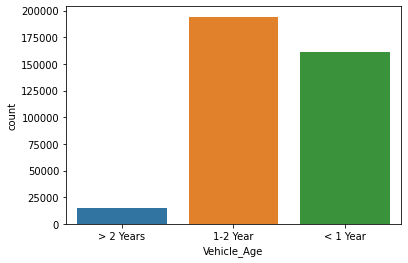

In [43]:
sns.countplot(x=df['Vehicle_Age'], data=df)
mp.show()

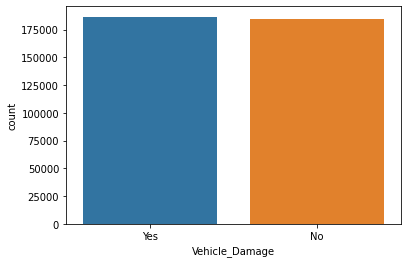

In [44]:
sns.countplot(x=df['Vehicle_Damage'], data=df)
mp.show()

In [45]:
#Catplot
df.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001464,-0.000321,-0.000277,0.002768,0.002857,-0.002595,-0.000108,-0.001658
Age,0.001464,1.000000,-0.078650,0.042626,-0.253794,0.050669,-0.576846,-0.001644,0.110938
Driving_License,-0.000321,-0.078650,1.000000,-0.001195,0.014297,-0.010189,0.043390,-0.000514,0.009630
Region_Code,-0.000277,0.042626,-0.001195,1.000000,-0.023736,-0.002358,-0.043020,-0.002948,0.009474
Previously_Insured,0.002768,-0.253794,0.014297,-0.023736,1.000000,0.014252,0.217038,0.002886,-0.340913
Annual_Premium,0.002857,0.050669,-0.010189,-0.002358,0.014252,1.000000,-0.107074,-0.000884,0.018566
Policy_Sales_Channel,-0.002595,-0.576846,0.043390,-0.043020,0.217038,-0.107074,1.000000,0.000010,-0.136805
Vintage,-0.000108,-0.001644,-0.000514,-0.002948,0.002886,-0.000884,0.000010,1.000000,-0.001631
Response,-0.001658,0.110938,0.009630,0.009474,-0.340913,0.018566,-0.136805,-0.001631,1.000000


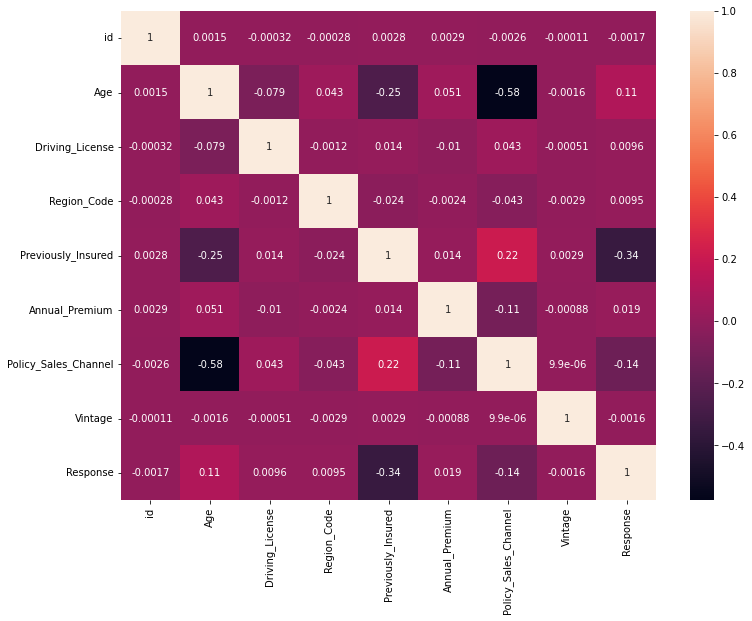

In [46]:
corr_df = df.corr()
mp.figure(figsize=(12, 9))
sns.heatmap(corr_df, annot=True, xticklabels=corr_df.columns, yticklabels=corr_df.columns)

In [47]:
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].map( {'No': 0, 'Yes': 1} ).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,1,40454,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,0,33536,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,1,38294,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,0,28619,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,0,27496,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,1-2 Year,0,30170,26.0,88,0
381105,381106,1,30,1,37.0,1,< 1 Year,0,40016,152.0,131,0
381106,381107,1,21,1,30.0,1,< 1 Year,0,35118,160.0,161,0
381107,381108,0,68,1,14.0,0,> 2 Years,1,44617,124.0,74,0


In [50]:
df['Vehicle_Age'] = df['Vehicle_Age'].map( {'< 1 Year': 'Vehicle under 1 year', '1-2 Year': 'Vehicle under 1-2 year','> 2 Years':'Vehicle under more than 2 years'} )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
df=pd.get_dummies(df) #drop_first=True

In [52]:
df.drop(['id'],axis=1, inplace=True)

In [53]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_Vehicle under 1 year,Vehicle_Age_Vehicle under 1-2 year,Vehicle_Age_Vehicle under more than 2 years
0,1,44,1,28.0,0,1,40454,26.0,217,1,0,0,1
1,1,76,1,3.0,0,0,33536,26.0,183,0,0,1,0
2,1,47,1,28.0,0,1,38294,26.0,27,1,0,0,1
3,1,21,1,11.0,1,0,28619,152.0,203,0,1,0,0
4,0,29,1,41.0,1,0,27496,152.0,39,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,0,30170,26.0,88,0,0,1,0
381105,1,30,1,37.0,1,0,40016,152.0,131,0,1,0,0
381106,1,21,1,30.0,1,0,35118,160.0,161,0,1,0,0
381107,0,68,1,14.0,0,1,44617,124.0,74,0,0,0,1


In [72]:
# for converting column type to int
df['Region_Code']=df['Region_Code'].astype(int)
df['Policy_Sales_Channel']=df['Policy_Sales_Channel'].astype(int)
df['Vehicle_Age_Vehicle under 1 year']=df['Vehicle_Age_Vehicle under 1 year'].astype(int)
df['Vehicle_Age_Vehicle under 1-2 year']=df['Vehicle_Age_Vehicle under 1-2 year'].astype(int)
df['Vehicle_Age_Vehicle under more than 2 years']=df['Vehicle_Age_Vehicle under more than 2 years'].astype(int)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370789 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                                       Non-Null Count   Dtype
---  ------                                       --------------   -----
 0   Gender                                       370789 non-null  int64
 1   Age                                          370789 non-null  int64
 2   Driving_License                              370789 non-null  int64
 3   Region_Code                                  370789 non-null  int64
 4   Previously_Insured                           370789 non-null  int64
 5   Vehicle_Damage                               370789 non-null  int64
 6   Annual_Premium                               370789 non-null  int64
 7   Policy_Sales_Channel                         370789 non-null  int64
 8   Vintage                                      370789 non-null  int64
 9   Response                                     370789 non-null  int64
 10  Vehicle_

Try converting them to int64 and check

In [95]:
X=df.drop(['Response'],axis=1)
y=df['Response']

In [96]:
X

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_Vehicle under 1 year,Vehicle_Age_Vehicle under 1-2 year,Vehicle_Age_Vehicle under more than 2 years
0,1,44,1,28,0,1,40454,26,217,0,0,1
1,1,76,1,3,0,0,33536,26,183,0,1,0
2,1,47,1,28,0,1,38294,26,27,0,0,1
3,1,21,1,11,1,0,28619,152,203,1,0,0
4,0,29,1,41,1,0,27496,152,39,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26,1,0,30170,26,88,0,1,0
381105,1,30,1,37,1,0,40016,152,131,1,0,0
381106,1,21,1,30,1,0,35118,160,161,1,0,0
381107,0,68,1,14,0,1,44617,124,74,0,0,1


In [97]:
y

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 370789, dtype: int64

In [98]:
ss=StandardScaler()

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [100]:
models = [
           ['LinearClassifier: ', Perceptron()],
           ['GNB: ', GaussianNB()],
           ['BNB: ', BernoulliNB()],
          #  ['SVC: ', SVC()],
           ['KNeighborsClassifier: ', KNeighborsClassifier()],
           ['DecisionTreeClassifier: ', DecisionTreeClassifier()],
           ['RandomForestClassifier ',RandomForestClassifier()],
           ['GradientBoostingClassifier: ', GradientBoostingClassifier()] ,
           ['XGBClassifier: ', XGBClassifier(eval_metric='mlogloss')],
           ['AdaBoostClassifier: ',AdaBoostClassifier()],
           ['LgbmClassifier: ',ltb.LGBMClassifier()]
         ]

In [101]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_accuracy_score"] = accuracy_score(y_train,[round(value) for value in (curr_model.predict(X_train))])
    curr_model_data["Test_accuracy_score"] = accuracy_score(y_test,[round(value) for value in (curr_model.predict(X_test))])
    curr_model_data["Test_precision_score"]= precision_score(y_test,[round(value) for value in (curr_model.predict(X_test))])
    curr_model_data["Test_f1_score"]= f1_score(y_test,[round(value) for value in (curr_model.predict(X_test))])
    curr_model_data["Test_roc_auc_score"]= roc_auc_score(y_test,[round(value) for value in (curr_model.predict(X_test))])
    model_data.append(curr_model_data)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
model_data

[{'Name': 'LinearClassifier: ',
  'Test_accuracy_score': 0.8790285606407939,
  'Test_f1_score': 0.0011134617525887986,
  'Test_precision_score': 0.08064516129032258,
  'Test_roc_auc_score': 0.4998434452268247,
  'Train_Time': 0.8488256931304932,
  'Train_accuracy_score': 0.8769548698551399},
 {'Name': 'GNB: ',
  'Test_accuracy_score': 0.7837050621645676,
  'Test_f1_score': 0.36620831357673467,
  'Test_precision_score': 0.2827506254194887,
  'Test_roc_auc_score': 0.6696906705809931,
  'Train_Time': 0.11175298690795898,
  'Train_accuracy_score': 0.7840819064763966},
 {'Name': 'BNB: ',
  'Test_accuracy_score': 0.7224304862590685,
  'Test_f1_score': 0.4166855588301972,
  'Test_precision_score': 0.278812241647389,
  'Test_roc_auc_score': 0.7664051203100334,
  'Train_Time': 0.12289619445800781,
  'Train_accuracy_score': 0.7217384561964191},
 {'Name': 'KNeighborsClassifier: ',
  'Test_accuracy_score': 0.8597588931740339,
  'Test_f1_score': 0.08899789768745621,
  'Test_precision_score': 0.2034

In [103]:
# making Dataframe of resuls
result= pd.DataFrame(model_data)

In [104]:
#showing results
result

,Name,Train_Time,Train_accuracy_score,Test_accuracy_score,Test_precision_score,Test_f1_score,Test_roc_auc_score
0,LinearClassifier:,0.848826,0.876955,0.879029,0.080645,0.001113,0.499843
1,GNB:,0.111753,0.784082,0.783705,0.282751,0.366208,0.669691
2,BNB:,0.122896,0.721738,0.722430,0.278812,0.416686,0.766405
3,KNeighborsClassifier:,1.184772,0.885885,0.859759,0.203444,0.088998,0.513235
4,DecisionTreeClassifier:,2.353881,0.999869,0.825616,0.285378,0.292095,0.598364
5,RandomForestClassifier,50.231701,0.999862,0.867243,0.344108,0.171924,0.542364
6,GradientBoostingClassifier:,48.781369,0.877882,0.879730,0.500000,0.000224,0.500048
7,XGBClassifier:,18.688429,0.877855,0.879730,0.000000,0.000000,0.500000
8,AdaBoostClassifier:,13.983873,0.877845,0.879730,0.000000,0.000000,0.500000
9,LgbmClassifier:,3.787629,0.878030,0.879285,0.253731,0.003784,0.500570


Hyper Parameter Tuning